# Face Recognition with PCA and SVM</br>
We will use dimension reduction becuase the image dimensions are large even for a small size image(say a 50*50 image is of 2500 features)
So using PCA and LDA dimension reduction techniques, we can transform them to less dimension depending on number of components.


1.   Create dataset.
2.   Reduce its dimensionality using PCA and LDA.
3.   Train a classifier(SVM).
4.   Plot results.


# Create dataset

In [0]:
import numpy as np
import cv2
import os
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import imutils

We will be using the yale dataset, specifically the Cropped one.

In [4]:
!wget http://vision.ucsd.edu/extyaleb/CroppedYaleBZip/CroppedYale.zip

--2020-06-12 07:48:56--  http://vision.ucsd.edu/extyaleb/CroppedYaleBZip/CroppedYale.zip
Resolving vision.ucsd.edu (vision.ucsd.edu)... 132.239.95.98
Connecting to vision.ucsd.edu (vision.ucsd.edu)|132.239.95.98|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58493820 (56M) [application/zip]
Saving to: ‘CroppedYale.zip’

CroppedYale.zip     100%[===================>]  55.78M   323KB/s    in 3m 0s   

2020-06-12 07:51:56 (318 KB/s) - ‘CroppedYale.zip’ saved [58493820/58493820]



In [0]:
!unzip /content/CroppedYale.zip

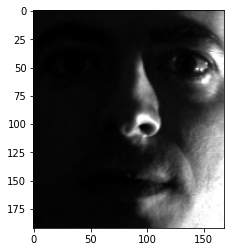

In [6]:
# sample face
img = cv2.imread('/content/CroppedYale/yaleB06/yaleB06_P00A-110E-20.pgm')
plt.imshow(img)
plt.show()

In [0]:
def make_dataset(imgs_dirs):
   imgs_mat = []
   for img_dir in imgs_dirs:
      imgs = os.listdir(img_dir) 
      for img in imgs:
          image_mat = cv2.imread(img_dir + img)
          image_mat = cv2.cvtColor(image_mat, cv2.COLOR_BGR2GRAY)
          image_mat = imutils.resize(image_mat, width=50, height= 50)
          image_mat = np.array(image_mat).flatten()

          imgs_mat.append(image_mat)
   return imgs_mat

def make_sample(img):

    image_mat = cv2.imread(img)
    image_mat = cv2.cvtColor(image_mat, cv2.COLOR_BGR2GRAY)
    image_mat = imutils.resize(image_mat, width=50, height= 50)
    image_mat = np.array(image_mat).flatten()
    image_mat = image_mat.reshape(1, 2850)
    return image_mat


In [0]:
# some data cleaning

!rm -rf '/content/CroppedYale/yaleB01/.ipynb_checkpoints'
!rm -rf '/content/CroppedYale/yaleB02/.ipynb_checkpoints'
!rm -rf '/content/CroppedYale/yaleB03/.ipynb_checkpoints'
!rm -rf '/content/CroppedYale/yaleB04/.ipynb_checkpoints'
!rm -rf '/content/CroppedYale/yaleB05/.ipynb_checkpoints'
!rm -rf '/content/CroppedYale/yaleB06/.ipynb_checkpoints'

In [53]:
dirs = ['/content/CroppedYale/yaleB01/', '/content/CroppedYale/yaleB02/',
        '/content/CroppedYale/yaleB03/', '/content/CroppedYale/yaleB04/']
faces_mat = make_dataset(dirs)
print('Image shape is 57,50')
faces_mat = np.array(faces_mat)
print('Dataset size',faces_mat.shape)

Image shape is 57,50
Dataset size (260, 2850)


In [0]:
# make y

y = np.zeros(260)
y[0:65] = 1
y[65:130] = 2
y[130:195] = 3
y[195:260] = 4

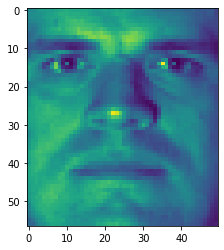

In [17]:
# sample face from created dataset

eg = faces_mat[200].reshape(57,50)
plt.imshow(eg)
plt.show()

In [0]:
# create test set

x_train, x_test, y_train, y_test = train_test_split(faces_mat, y, test_size=0.1)

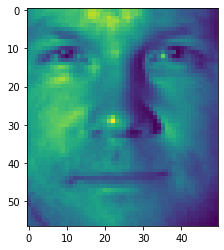

In [193]:
eg = x_test[20].reshape(57,50)
plt.imshow(eg)
plt.show()

# Dimensionality Reduction using PCA and LDA.

In [0]:
# make dummby pca to plot faces

N_COMPONENT = 2

pca = decomposition.PCA(n_components=N_COMPONENT, random_state=42)
pca_components = pca.fit_transform(faces_mat)

In [23]:
print("Variance component wise: {0}".format(pca.explained_variance_ratio_))

Variance component wise: [0.44754749 0.32984631]


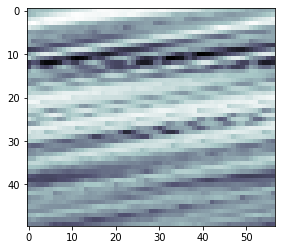

In [24]:
# mean face
plt.imshow(pca.mean_.reshape(50, 57), cmap=plt.cm.bone)
plt.show()

Mean face is not visible since there is are less samples per subject. With more samples in training face can be visible.

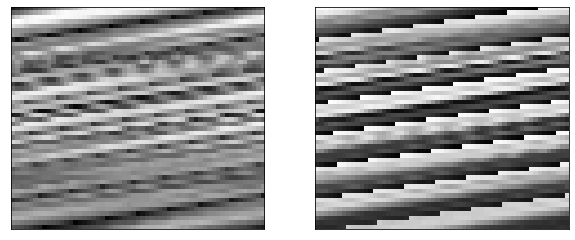

In [115]:
# show what 2 components have learned(also called eigen faces)

fig = plt.figure(figsize=(10,5))

for i in range(N_COMPONENT):
    ax = fig.add_subplot(1, N_COMPONENT, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(50,57),
              cmap='gray')

In [0]:
# rescale data then create pca

x = StandardScaler().fit_transform(x_train)
pca = decomposition.PCA(n_components=N_COMPONENT, random_state=42)
pca_components = pca.fit_transform(x, y_train)

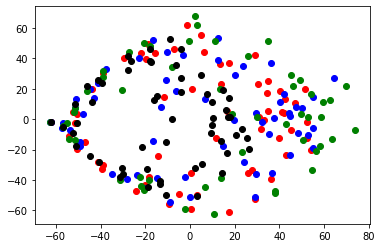

In [199]:
# plot 2 components with 4 classes(face classes)

plt.scatter(pca_components[y_train==1, 0], pca_components[y_train==1, 1], color=('r'))
plt.scatter(pca_components[y_train==2, 0], pca_components[y_train==2, 1], color=('b'))
plt.scatter(pca_components[y_train==3, 0], pca_components[y_train==3, 1], color=('g'))
plt.scatter(pca_components[y_train==4, 0], pca_components[y_train==4, 1], color=('black'))
plt.show()

The clusters are hard to find, we had 4 classes, the values are scattered very far away from each other.</br> Lets use LDA which has better strategy to reduce inner-class variance and increase outer-class variance.

In [218]:
# with lda

x = StandardScaler().fit_transform(x_train)
lda = LinearDiscriminantAnalysis(n_components=N_COMPONENT)
lda_components = lda.fit_transform(x, y_train)
print('Components variance ratio: ',lda.explained_variance_ratio_)
print('Almost ~23% of data loss')

Components variance ratio:  [0.41229892 0.37108143]
Almost ~23% of data loss


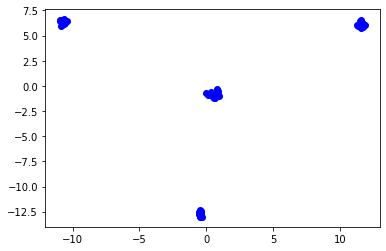

In [202]:
# plot lda

plt.scatter(lda_components[:, 0], lda_components[:, 1], color=('b'))
plt.show()

As here the clusters are well recognized. This processed data can be further used to train a classifier.

# Train a classifier(SVM)


In [239]:
# train a classifier to detect faces
# pca

x = StandardScaler().fit_transform(x_train)

pca = decomposition.PCA(n_components=20, random_state=42)
pca_components = pca.fit_transform(x, y_train)

clf1 = SVC(gamma='auto')
clf1.fit(pca_components, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [236]:
# lda

lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(x, y_train)

clf2 = SVC(gamma='auto')
clf2.fit(lda_components, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# predict with both classifiers

pca_x_test = pca.transform(x_test) 
lda_x_test = lda.transform(x_test) 

yhat1 = clf1.predict(pca_x_test)
yhat2 = clf2.predict(lda_x_test)

In [241]:
print('PCA: {0} Correct out of {1}'.format(len(yhat1[y_test == yhat1]), len(y_test)))

print('LDA: {0} Correct out of {1}'.format(len(yhat2[y_test == yhat2]), len(y_test)))

PCA: 2 Correct out of 26
LDA: 8 Correct out of 26


Due to lack of training data per subject the results are poor. Also the faces in this dataset have different illuminations that affect the PCA and LDA very much. With Deep Learning the results can be much better but still it will require many more faces to train on. 

# Plot results.


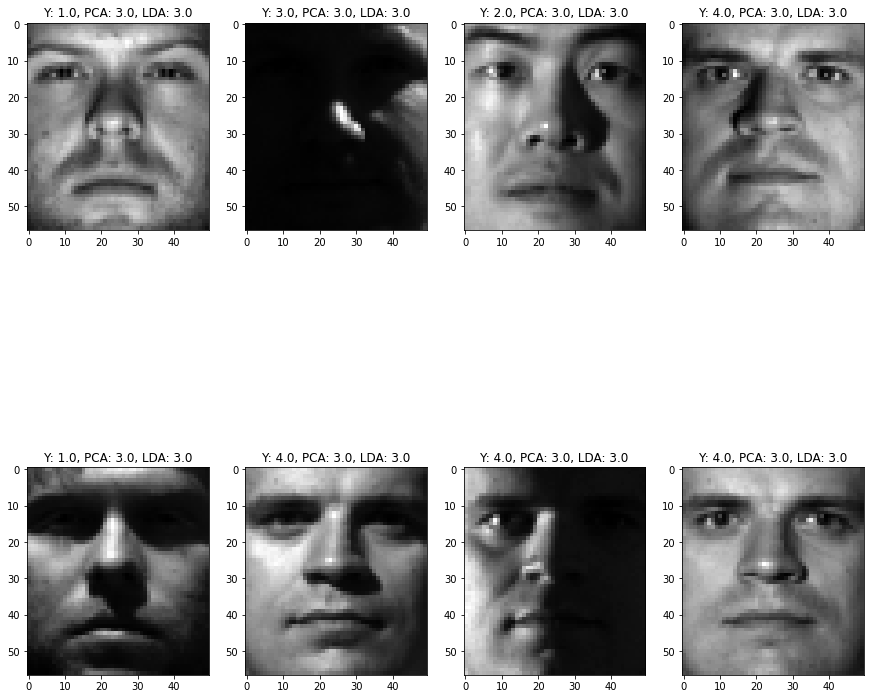

In [191]:
# lets plot images with results

results = {'Y': y_test,
           'PCA': yhat1,
           'LDA': yhat2}

f, axs = plt.subplots(2,4)
# f.tight_layout()
f.set_figheight(15)
f.set_figwidth(15)

a= 0

for i in range(rows):
  for j in range(cols):
    axs[i,j].imshow(x_test[a].reshape(57, 50), cmap='gray')
    axs[i,j].set_title("Y: {0}, PCA: {1}, LDA: {2}".format(results['Y'][a], results['PCA'][a], results['LDA'][a]))
    a+=1


Summary: 
While using Face recognition with Classic machine learning(No Deep learning)

*   Take faces cropped images.
*   Take many faces per subject(>50 or 100).
*   Take faces with same illuminations(Similar lighting conditions).
*   Use Deep learning.

